In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("clean_algerian_forest.csv")

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(["day","month", "year"], axis=1,inplace=True)

In [5]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [7]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
#independant and dependant features
X=df.drop("FWI", axis=1)
y=df['FWI']

In [10]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [11]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [12]:
X_train.corr()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Unnamed: 0,1.000000,0.222788,-0.367511,-0.187296,-0.055222,0.244364,0.271848,0.072597,0.317535,0.201261,0.196463,0.867030
Temperature,0.222788,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.367511,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.187296,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.055222,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.244364,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.271848,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.072597,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.317535,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.201261,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897


<Axes: >

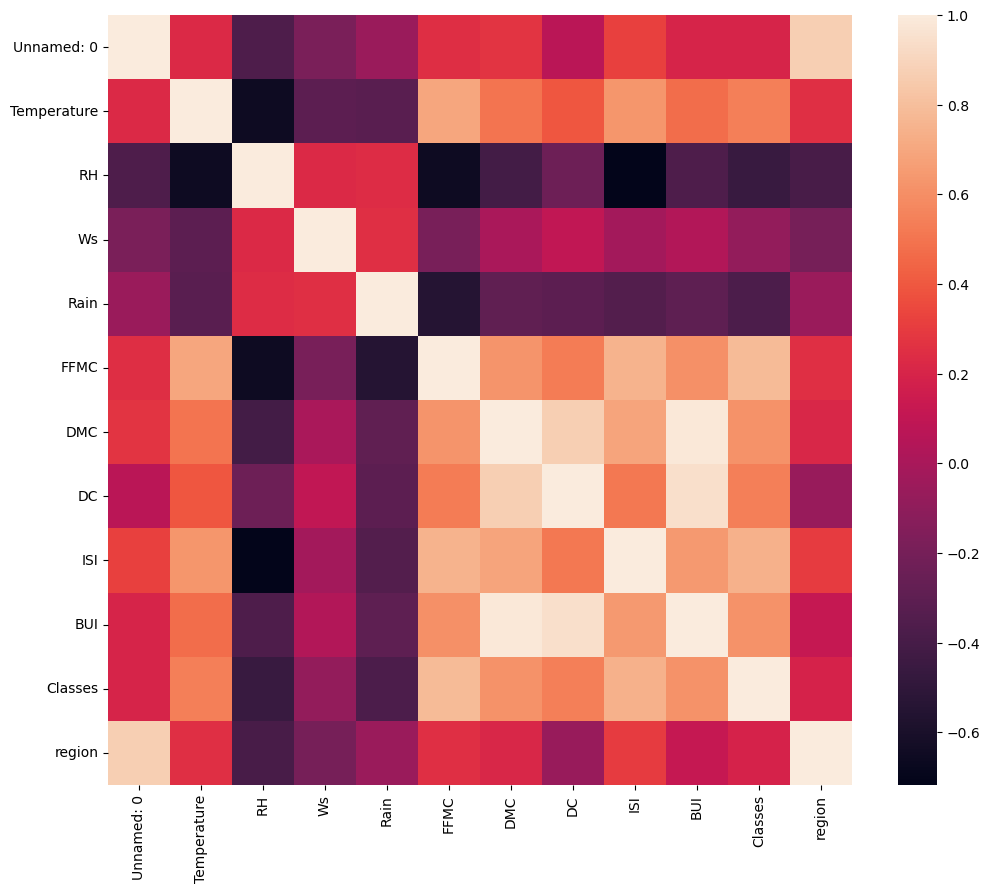

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr())

In [14]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features=correlation(X_train, 0.85)

In [16]:
#Drop those feature
X_test.drop(corr_features, axis=1, inplace=True)
X_train.drop(corr_features, axis=1, inplace=True)

## Feature Scaling and Standardisation

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Box plot to understand the effect of Standardization

Text(0.5, 1.0, 'X after scaling')

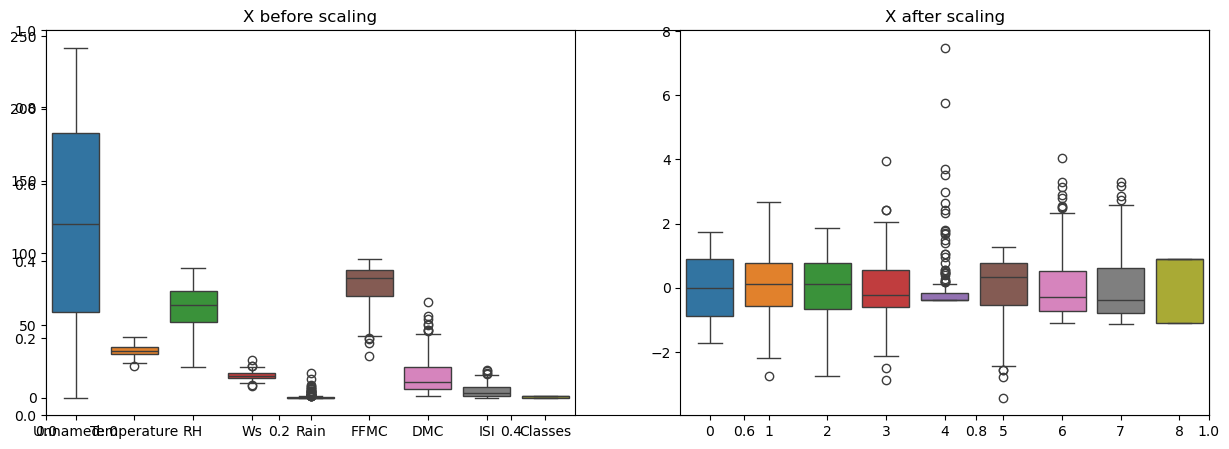

In [19]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X after scaling")

## Linear Regression Model 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absolute error is ", mae)
print("score is ",score)

mean absolute error is  0.5310423080373817
score is  0.9842013874151916


## Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absolute error is ", mae)
print("score is ",score)

mean absolute error is  1.1331797691846892
score is  0.9492008839717639


In [34]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv=LassoCV(cv=10)
lassocv.fit(X_train_scaled, y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absolute error is ", mae)
print("score is ",score)

mean absolute error is  0.5673109023219864
score is  0.9830235821937698


## Ridge Regression model

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absolute error is ", mae)
print("score is ",score)

mean absolute error is  0.5523063707254482
score is  0.983676555604412


In [36]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv=RidgeCV(cv=2)
ridgecv.fit(X_train_scaled, y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absolute error is ", mae)
print("score is ",score)

mean absolute error is  0.5523063707254482
score is  0.983676555604412


## Elasticnet Regression

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absolute error is ", mae)
print("score is ",score)

mean absolute error is  1.8822336088419482
score is  0.875346401550489


In [37]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnetcv=ElasticNetCV()
elasticnetcv.fit(X_train_scaled, y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absolute error is ", mae)
print("score is ",score)

mean absolute error is  0.6525416416304306
score is  0.9805069854347187


In [38]:
scaler

StandardScaler()

In [39]:
ridge

Ridge()